In [82]:
import pandas as pd
import numpy as np

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
vgames = pd.read_csv('gamesku.csv')
vgames

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


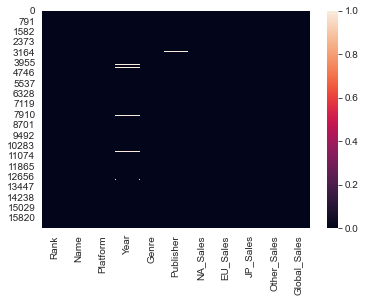

(16598, 11) 



In [85]:
display(vgames.head())

sns.heatmap(vgames.isnull())
plt.show()

print(vgames.shape, "\n")

plt.show()

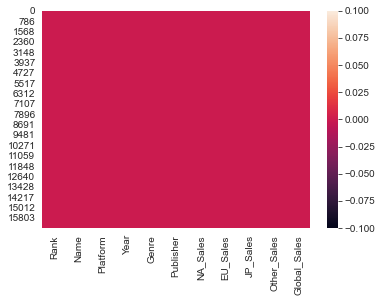

In [86]:
vgames = vgames.dropna(subset=['Publisher','Year'])
sns.heatmap(vgames.isnull())
plt.show()

In [87]:
print('row :', vgames.shape[0])
print('column :', vgames.shape[1])
print(vgames.info(),'\n')
print(vgames.describe())

row : 16291
column : 11
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None 

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
st

In [88]:
publishercol = vgames.drop(columns = ['Rank', 'Year', 'Genre', 'Name','Platform'])
publishersum = publishercol.groupby('Publisher').sum()
publishersum = publishersum.sort_values(by=['Global_Sales'], ascending=False).head(10)
publishersum = publishersum.rename(index={'Electronic Arts':'EA',
                                    'Sony Computer Entertainment': 'Sony',
                                    'Take-Two Interactive': 'Take-Two',
                                    'Konami Digital Entertainment':'Konami',
                                    'Namco Bandai Games':'Namco'})
publishersum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
EA,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54
Take-Two,220.47,117.95,5.83,55.20,399.30
THQ,208.60,94.60,5.01,32.11,340.44
Konami,88.91,68.62,90.93,29.91,278.56
Sega,108.78,81.41,56.19,24.30,270.70


In [89]:
publishermean = publishersum.drop(columns = 'Global_Sales')
publishermean = publishermean.mean(axis=1) 
publishermean

Publisher
Nintendo      446.0575
EA            273.3025
Activision    180.2650
Sony          151.8175
Ubisoft       118.3325
Take-Two       99.8625
THQ            85.0800
Konami         69.5925
Sega           67.6700
Namco          63.3675
dtype: float64

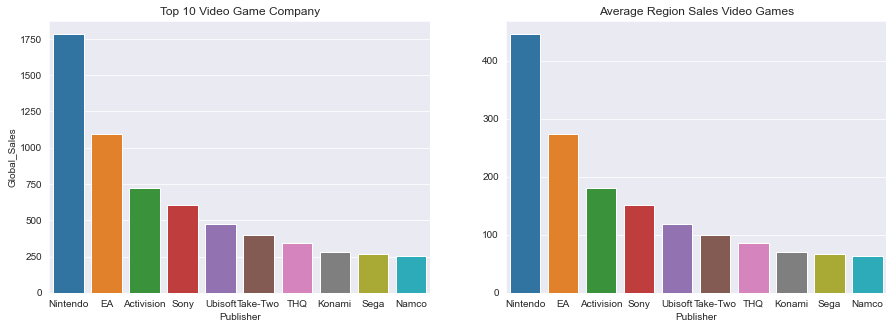

In [90]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.barplot(x=publishersum.index, y=publishersum['Global_Sales'], ax=ax[0])
sns.set_style("darkgrid")
ax[0].set_title('Top 10 Video Game Company')

sns.barplot(x=publishermean.index, y=publishermean, ax=ax[1])
sns.set_style("darkgrid")
ax[1].set_title('Average Region Sales Video Games')
plt.show()

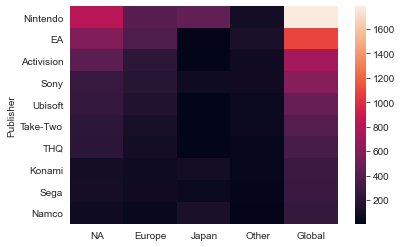

In [91]:
publisherheatmap = publishersum.rename(columns={'NA_Sales':'NA',
                                    'EU_Sales': 'Europe',
                                    'JP_Sales': 'Japan',
                                    'Other_Sales':'Other',
                                    'Global_Sales':'Global'})
sns.heatmap(publisherheatmap)
plt.show()

In [92]:
genre = vgames.drop(columns = ['Rank', 'Year','Name','Platform','Publisher'])
genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,41.49,29.02,3.77,8.46,82.74
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.85,12.88,3.79,3.31,35.82
3,Sports,15.75,11.01,3.28,2.96,33.00
4,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16593,Platform,0.01,0.00,0.00,0.00,0.01
16594,Shooter,0.01,0.00,0.00,0.00,0.01
16595,Racing,0.00,0.00,0.00,0.00,0.01
16596,Puzzle,0.00,0.01,0.00,0.00,0.01


In [93]:
genrecounts = genre.groupby('Genre').count()
genrecounts = genrecounts.rename(index={'Role-Playing':'Roleplay'})
genrecounts = genrecounts.sort_values('NA_Sales', ascending=False)
genrecounts

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,3251,3251,3251,3251,3251
Sports,2304,2304,2304,2304,2304
Misc,1686,1686,1686,1686,1686
Roleplay,1470,1470,1470,1470,1470
Shooter,1282,1282,1282,1282,1282
Adventure,1274,1274,1274,1274,1274
Racing,1225,1225,1225,1225,1225
Platform,875,875,875,875,875
Simulation,848,848,848,848,848


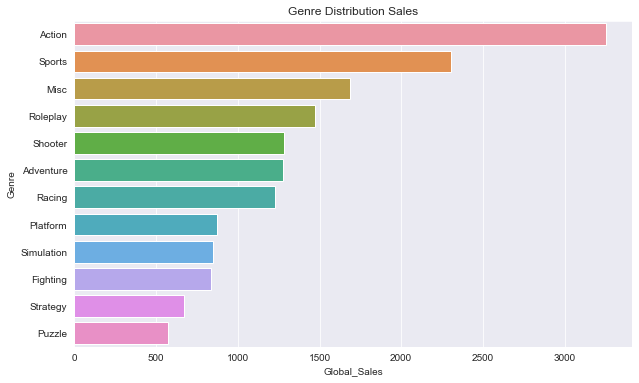

In [94]:
plt.figure(figsize=(10,6))
plt.title("Genre Distribution Sales")
sns.barplot(x=genrecounts['Global_Sales'], y=genrecounts.index)
sns.set_style("darkgrid")

In [95]:
yeargrowth = vgames.drop(columns = ['Rank', 'Genre', 'Name','Platform','NA_Sales','EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales'])
yeargrowth

,Year,Publisher,Global_Sales
0,2006.0,Nintendo,82.74
1,1985.0,Nintendo,40.24
2,2008.0,Nintendo,35.82
3,2009.0,Nintendo,33.00
4,1996.0,Nintendo,31.37
...,...,...,...
16593,2002.0,Kemco,0.01
16594,2003.0,Infogrames,0.01
16595,2008.0,Activision,0.01
16596,2010.0,7G//AMES,0.01


In [96]:
nintendogrow = yeargrowth[yeargrowth['Publisher'] == 'Nintendo']
eagrow = yeargrowth[yeargrowth['Publisher'] == 'Electronic Arts']
activisiongrow = yeargrowth[yeargrowth['Publisher'] == 'Activision']
sonygrow = yeargrowth[yeargrowth['Publisher'] == 'Sony Computer Entertainment']

Text(0.5, 1.0, 'Sony Sales Growth')

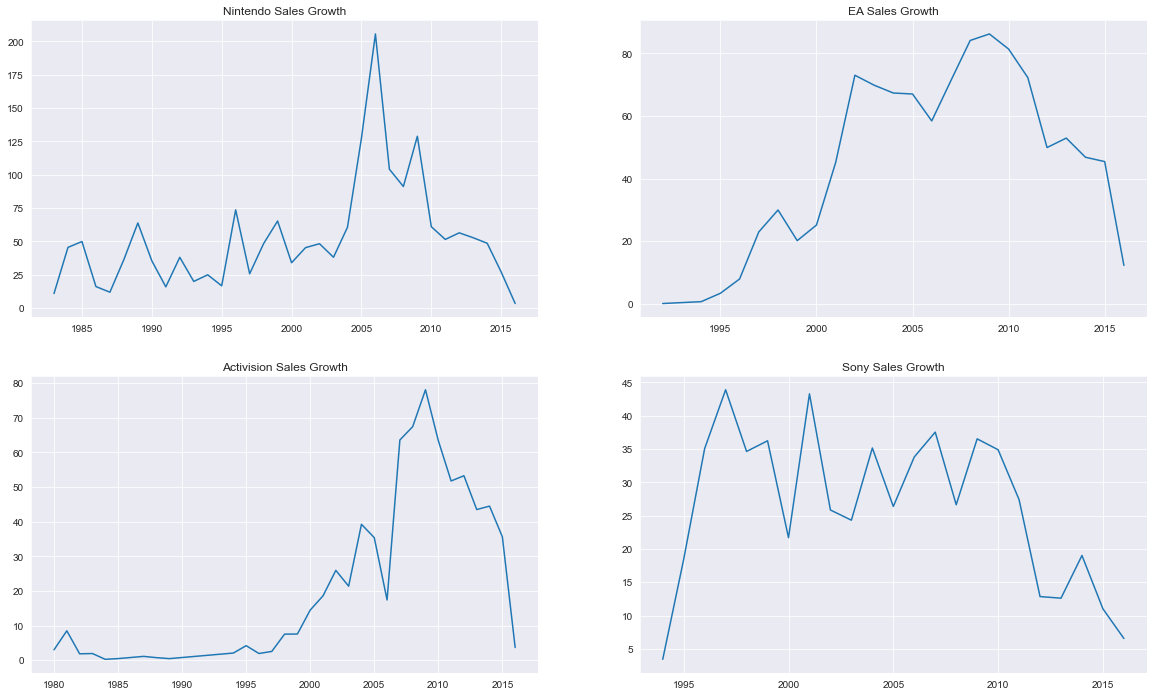

In [97]:
fig, ax = plt.subplots(2,2,figsize=(20,12))

nintendogrow = nintendogrow.groupby('Year').sum()
eagrow = eagrow.groupby('Year').sum()
activisiongrow = activisiongrow.groupby('Year').sum()
sonygrow = sonygrow.groupby('Year').sum()

ax[0,0].plot(nintendogrow)
ax[0,0].set_title('Nintendo Sales Growth')

ax[0,1].plot(eagrow)
ax[0,1].set_title('EA Sales Growth')

ax[1,0].plot(activisiongrow)
ax[1,0].set_title('Activision Sales Growth')

ax[1,1].plot(sonygrow)
ax[1,1].set_title('Sony Sales Growth')

In [98]:
platform = vgames.drop(columns = ['Rank', 'Genre', 'Name','Year','Publisher','NA_Sales','EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales'])
platform = platform.groupby('Platform').count()
platform = platform.sort_values('Global_Sales', ascending=False)
platform = platform.head(10)
# platform = platform['Platform'].value_counts()
# platform = platform.head(10)
platform 

,Global_Sales
Platform,
DS,2131
PS2,2127
PS3,1304
Wii,1290
X360,1234
PSP,1197
PS,1189
PC,938
XB,803


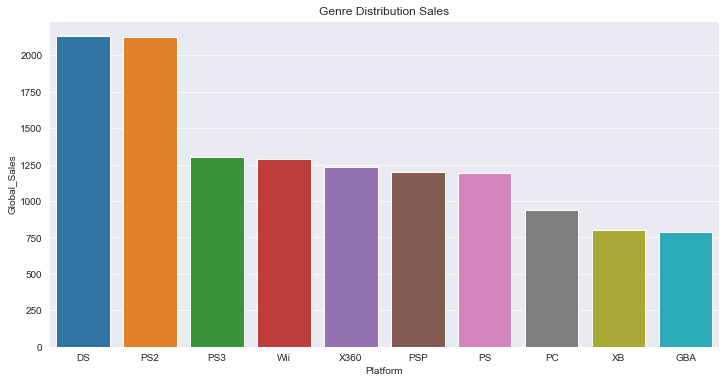

In [99]:
plt.figure(figsize=(12,6))
plt.title("Genre Distribution Sales")
sns.barplot(x=platform.index, y=platform['Global_Sales'])
sns.set_style("darkgrid")